**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [22]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [23]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [24]:
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [25]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

784
(60000, 784)


#convert data to float and scale values between 0 and 1

In [26]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [27]:
train_data /=255.0
test_data /=255.0

change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [28]:
train_labels_one_hot = to_categorical(train_labels)


test_labels_one_hot = to_categorical(test_labels)

In [29]:
print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#creating network

### 1- a. Change the number of hidden layers and the activation to tanh or sigmoid and report what happens:
Here is the result based on the first epoch:

*   relu: loss: 0.5819 - accuracy: 0.8272 - val_loss: 0.1135 - val_accuracy: 0.9659

*   tanh: loss: 0.5158 - accuracy: 0.8495 - val_loss: 0.1590 - val_accuracy: 0.9526

*   sigmoid: loss: 1.7816 - accuracy: 0.4098 - val_loss: 0.4346 - val_accuracy: 0.8955






In [82]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [84]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model

In [85]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 1.7816 - accuracy: 0.4098 - val_loss: 0.4346 - val_accuracy: 0.8955
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3883 - accuracy: 0.9011 - val_loss: 0.2525 - val_accuracy: 0.9336
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2267 - accuracy: 0.9403 - val_loss: 0.1963 - val_accuracy: 0.9473
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1684 - accuracy: 0.9538 - val_loss: 0.1663 - val_accuracy: 0.9534
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1318 - accuracy: 0.9635 - val_loss: 0.1425 - val_accuracy: 0.9589
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1062 - accuracy: 0.9710 - val_loss: 0.1249 - val_accuracy: 0.9645
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.9766 - val_loss: 0.1105 - val_accuracy: 0.9684
Epoch 

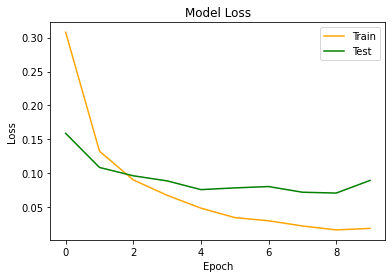

In [68]:
# 2. Using the history object in the source code, plot the loss and accuracy for both training data and validation data.
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],c='orange')
plt.plot(history.history['val_loss'], c='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

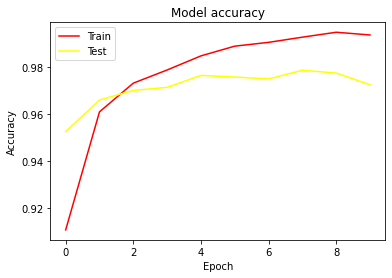

In [69]:
plt.plot(history.history['accuracy'], c='red')
plt.plot(history.history['val_accuracy'], c='yellow')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 3. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data.

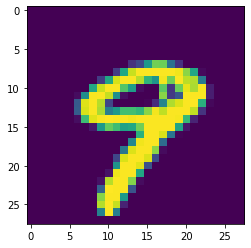

In [70]:
# plt.imshow(test_data[0].reshape([28,28])) # test_images.reshape(test_images.shape[0],dimData)
plt.imshow(test_images[9])

In [71]:
res = model.predict(test_data[9:10])
print("The predicted image for test data is", res)

The predicted image for test data is [[6.7748565e-06 2.8463593e-05 6.8787199e-07 2.0773958e-04 3.5874266e-04
  2.9451967e-05 1.2454756e-06 8.2621481e-03 6.7157875e-05 9.9103761e-01]]


In [72]:
#print(res)
print(res.argmax()) # Returns the indices of the maximum values along an axis.

9


## 4. Convert the sequential model to API model.

In [86]:
from keras.models import Model
from keras.layers import Input

i = Input(shape=(784,))
x = Dense(512, activation='sigmoid')(i)
x = Dense(256, activation='sigmoid')(x)
x = Dense(128, activation='sigmoid')(x)
x = Dense(64, activation='sigmoid')(x)
x = Dense(10, activation='sigmoid')(x)
modell = Model(inputs=i,outputs=x)

#compile it
modell.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
#fit the model
history1 = modell.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1, validation_data=(test_data, test_labels_one_hot))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 1.7831 - accuracy: 0.4250 - val_loss: 0.4291 - val_accuracy: 0.8964
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.9069 - val_loss: 0.2432 - val_accuracy: 0.9354
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2210 - accuracy: 0.9406 - val_loss: 0.2064 - val_accuracy: 0.9413
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1632 - accuracy: 0.9544 - val_loss: 0.1435 - val_accuracy: 0.9588
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1292 - accuracy: 0.9648 - val_loss: 0.1349 - val_accuracy: 0.9610


In [88]:
#API model summary
modell.summary() 

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_____________________________________________________

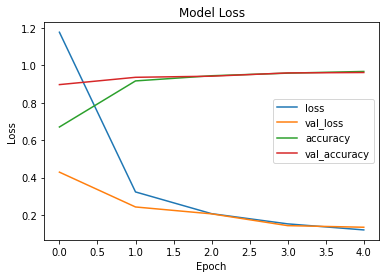

In [89]:
#plot the API model
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='right')
plt.show()